In [1]:
import os, mne, socket
from mne_bids import BIDSPath, read_raw_bids
# import pyQt5

%matplotlib qt

# Get the hostname
hostname = socket.gethostname()

if 'hpc' in hostname:
    # You are running your code on HPC
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    dataPath = os.path.join(os.sep, 'scratch', 'work', 'courses', 'PSYCH-GA-3405-2024fa')
elif hostname == 'sebastian_mac':
    # You are Sebastian
    # Setting up paths for data
    mydir = os.getcwd()
    path_parts = mydir.split(os.sep)
    idcs = [i for i, c in enumerate(mydir) if c == os.sep]
    dataPath = mydir[:idcs[-2]]
else:
    # You are running on your device with Google drive path
    # Define the paths and initialize Fieldtrip
    my_user_id = 'mdd9787'  # change this to your netID
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    base_dir = os.path.join(os.sep, *path_parts[:3])
    dataPath = os.path.join(base_dir, 'Library', 'CloudStorage', f'GoogleDrive-{my_user_id}@nyu.edu', 'My Drive', 'Coursework', 'EEG MEG methods', 'ClassData')

eegRoot = os.path.join(dataPath, 'EEGBids')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
## Load data
groupName = 'GroupD'  # Change group name to analyze different dataset (valid IDs: GroupA, GroupC, GroupD)
userName = 'mrugank'  # Make sure to ensure that you are writing to your derivatives 
taskName = 'oddball'

# Get subject code for your group
groupMap = {'GroupA': '001', 'GroupC': '003', 'GroupD': '004'}
subjCode = groupMap[groupName]

dataPath = os.path.join(eegRoot, f'sub-{subjCode}', 'eeg')
derivPath = os.path.join(eegRoot, 'derivatives', userName, 'preprocessing', f'sub-{subjCode}')

if not os.path.exists(derivPath):
    os.makedirs(derivPath)

saveRoot = f'sub-{subjCode}_task-{taskName}_'

In [3]:
# Load the data
raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
# Set channel types for EOG
raw.set_channel_types({'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog', 'EXG4': 'eog'})
# Remove unwanted channels
unwanted_channels = ['EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
raw.drop_channels(unwanted_channels)

/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_59434/1399084057.py:2: RuntimeWarning: The number of channels in the channels.tsv sidecar file (261) does not match the number of channels in the raw data file (272). Will not try to set channel names.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_59434/1399084057.py:2: RuntimeWarning: The unit for channel(s) Status has changed from NA to V.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_59434/1399084057.py:2: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EXG1', 'EXG2', 'EXG3', 'EXG4']
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_59434/1399084057.py:2: RuntimeWarning: Di

<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~347 kB, data not loaded>

Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   16.2s finished


Using matplotlib as 2D backend.
Channels marked as bad:
none


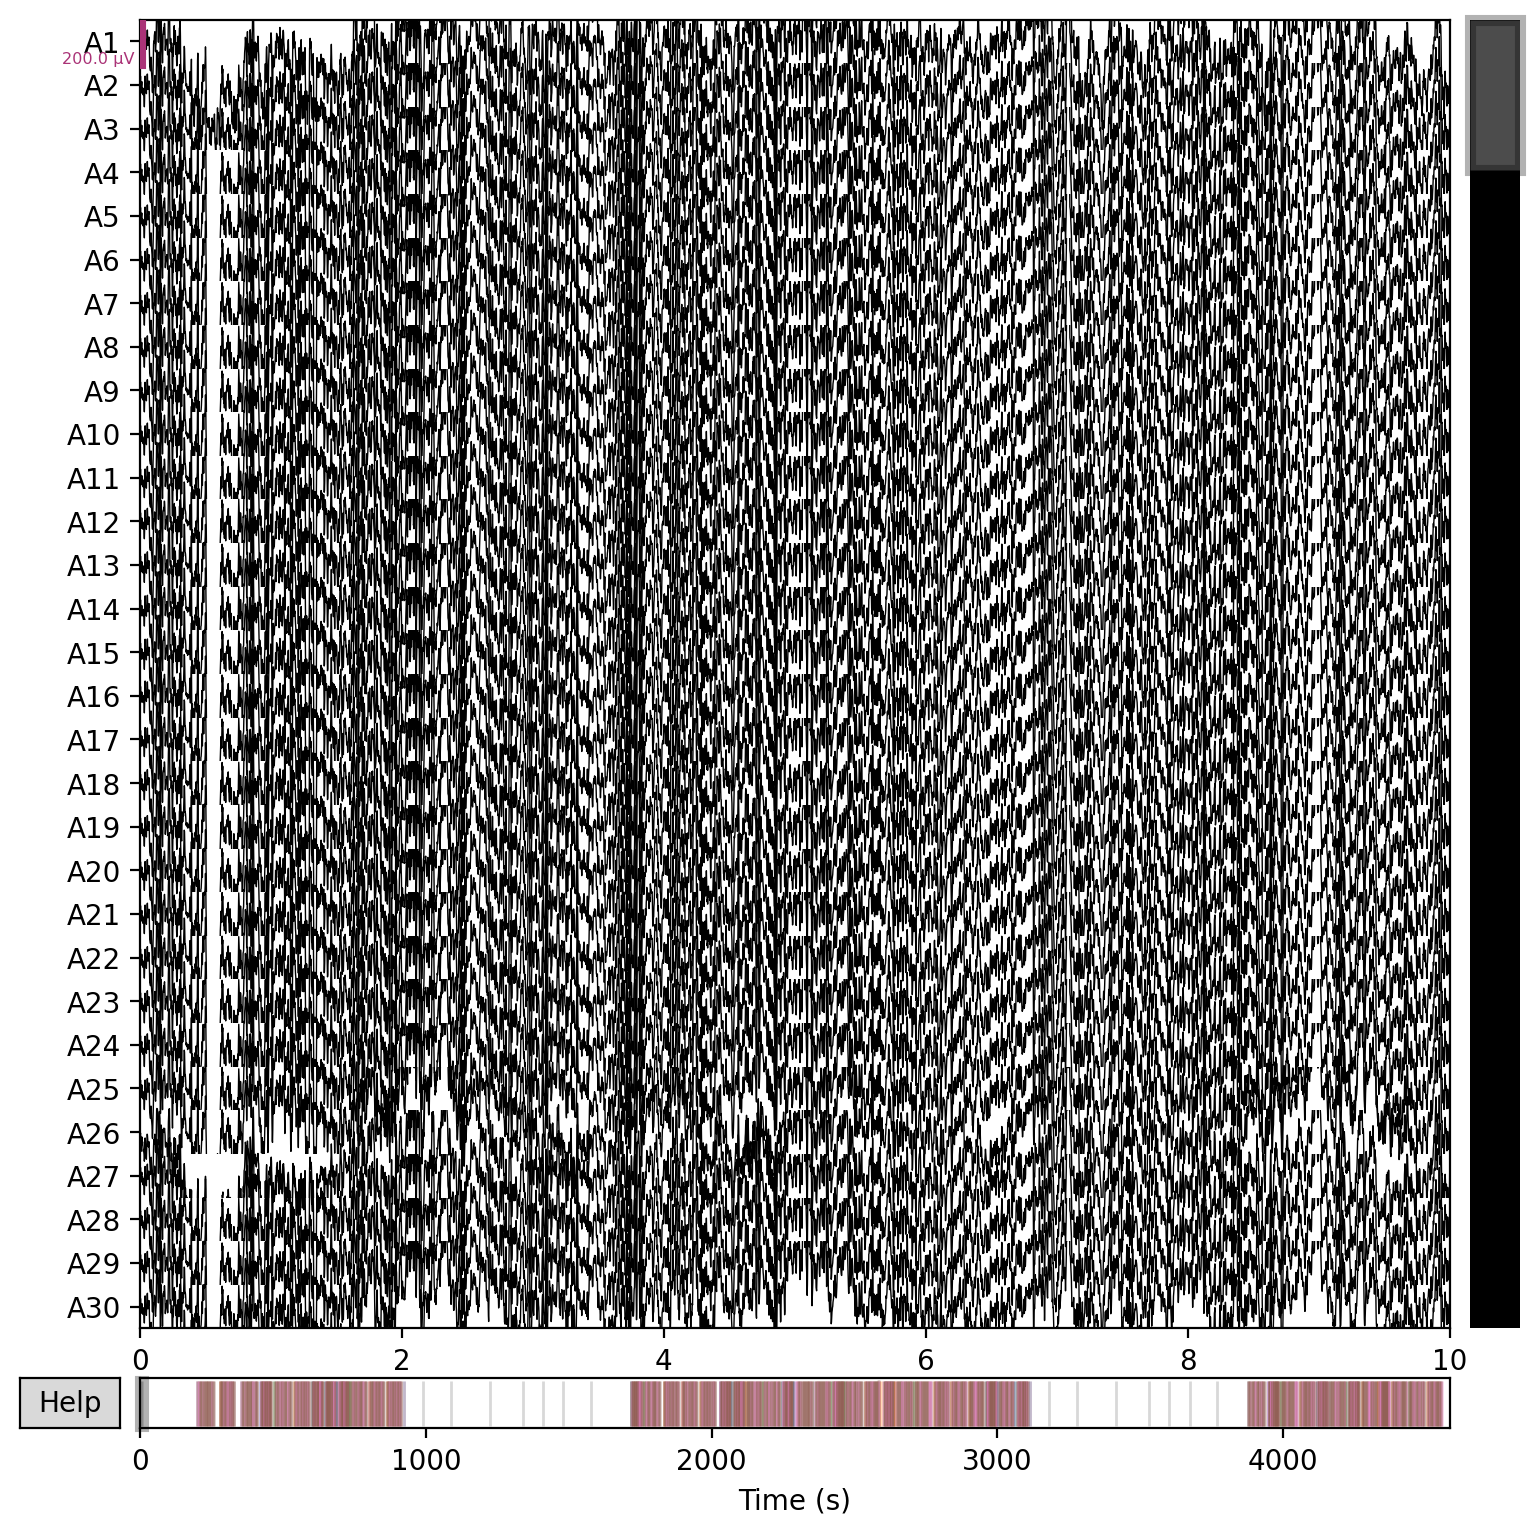

In [4]:
# Visualize the data
raw_copy = raw.copy()
raw_copy.load_data()
raw_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
raw_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)


Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   15.8s finished


Channels marked as bad:
none


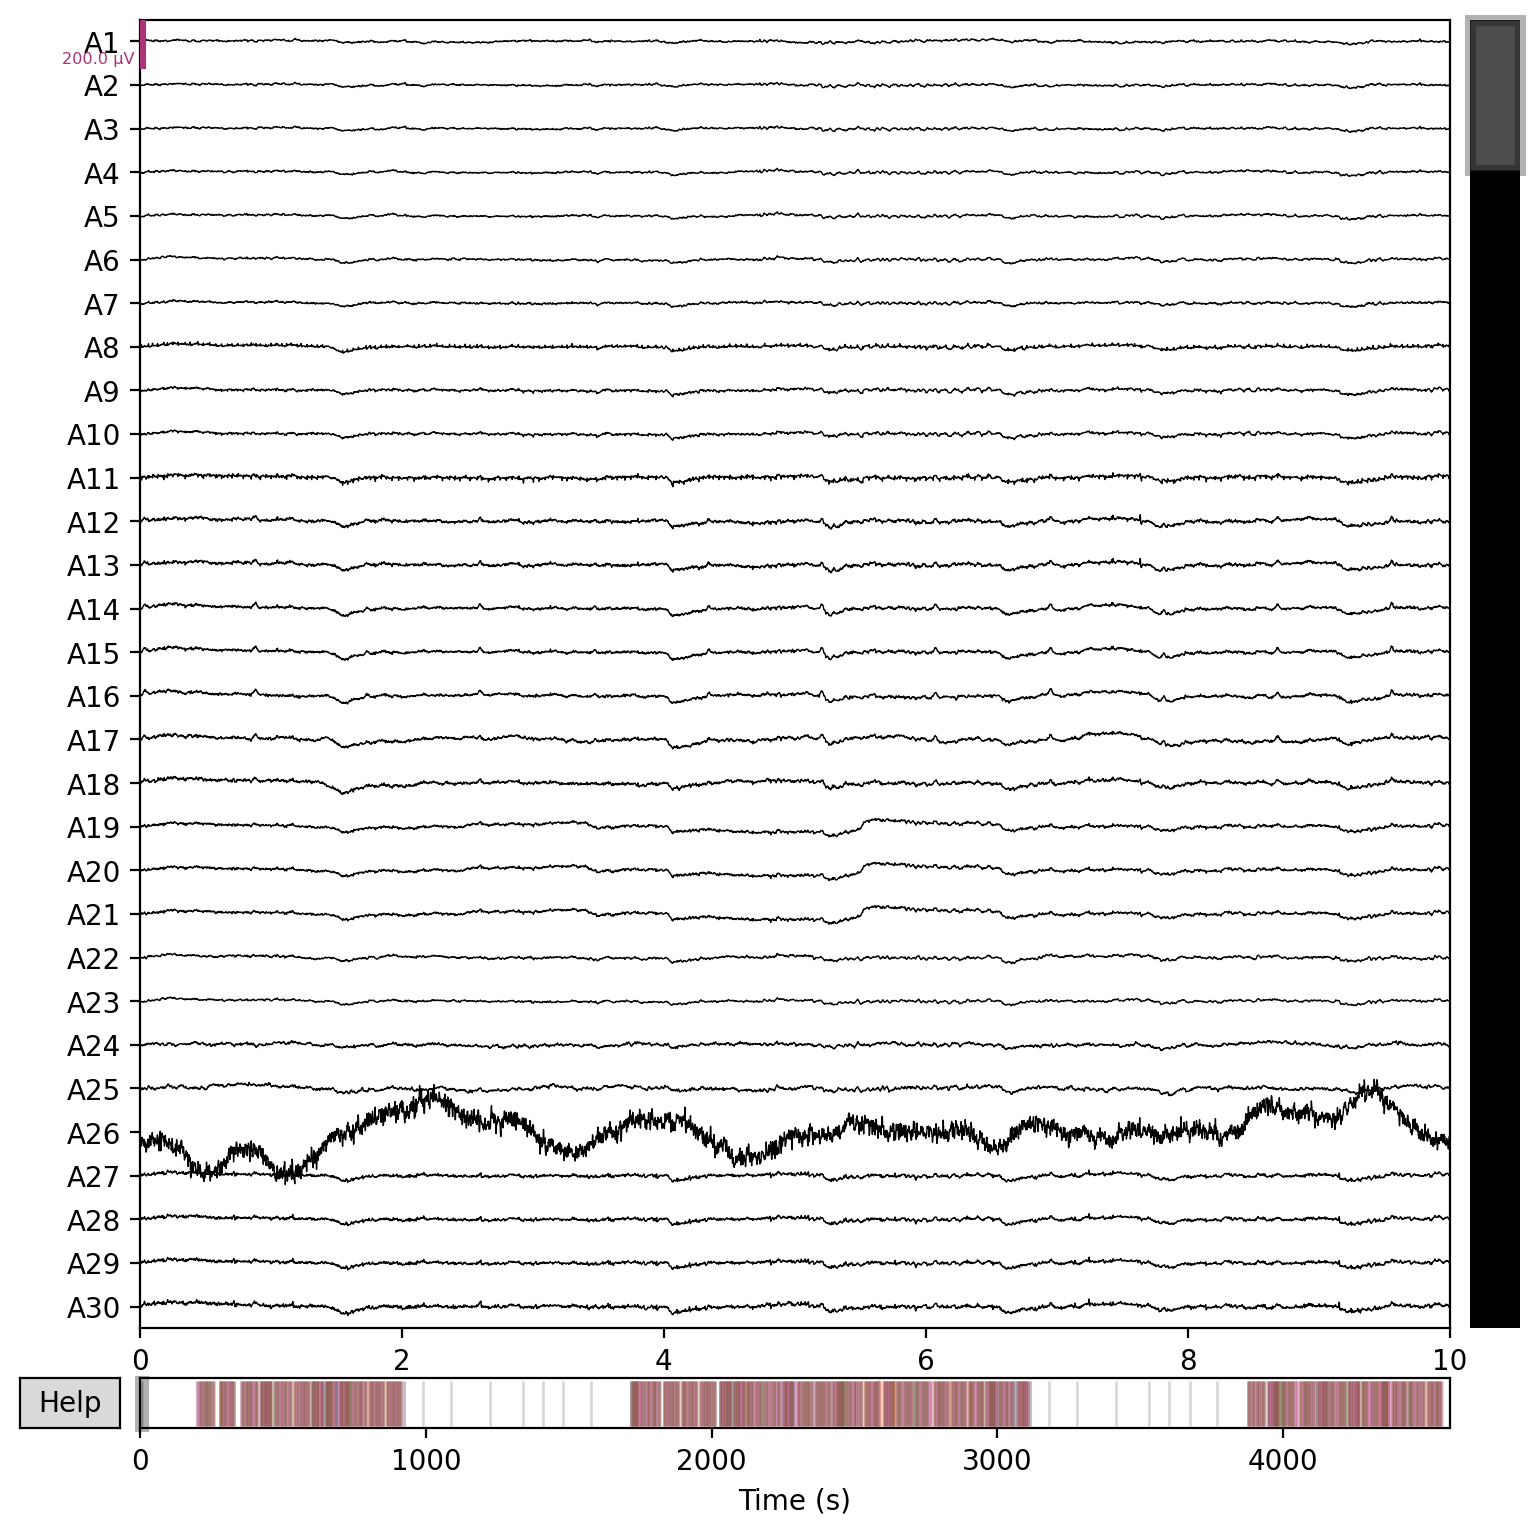

In [5]:
# First step is we re-reference the data to average reference
raw_avg = raw.copy()
raw_avg.load_data()
raw_avg.set_eeg_reference(ref_channels='average')
# Visualize the data
raw_avg_copy = raw_avg.copy()
raw_avg_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
raw_avg_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

In [6]:
# Identify bad channels
# B7, 9, 25?, C18?, G30?, F2, E5
bad_channels = ['A26', 'B2', 'B3', 'B4', 'B7', 'B8', 'B19', 
                'C9', 'C30', 'D15', 'E5', 'F2', 'F22', 'G25', 'G29']

# go back one step and interpolate
# then re-reference again!
# then epoch the data

In [7]:
# Interpolate bad channels
raw_interp = raw_avg.copy()
raw_interp.load_data()
raw_interp.info['bads'] += bad_channels
raw_interp.interpolate_bads()

# Visualize the data
# raw_interp_copy = raw_interp.copy()
# raw_interp_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
# raw_interp_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

# Re-reference the data
raw_interp.set_eeg_reference(ref_channels='average')

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 92320.6 mm
Computing interpolation matrix from 241 sensor positions
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Interpolating 15 sensors


/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_59434/1790430773.py:5: RuntimeWarning: Estimated head radius (9232.1 cm) is above the 99th percentile for adult head size.
  raw_interp.interpolate_bads()
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_59434/1790430773.py:5: RuntimeWarning: (X, Y) fit (9367.1, 12.6) more than 20 mm from head frame origin
  raw_interp.interpolate_bads()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~4.56 GB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   16.7s finished


Channels marked as bad:
none


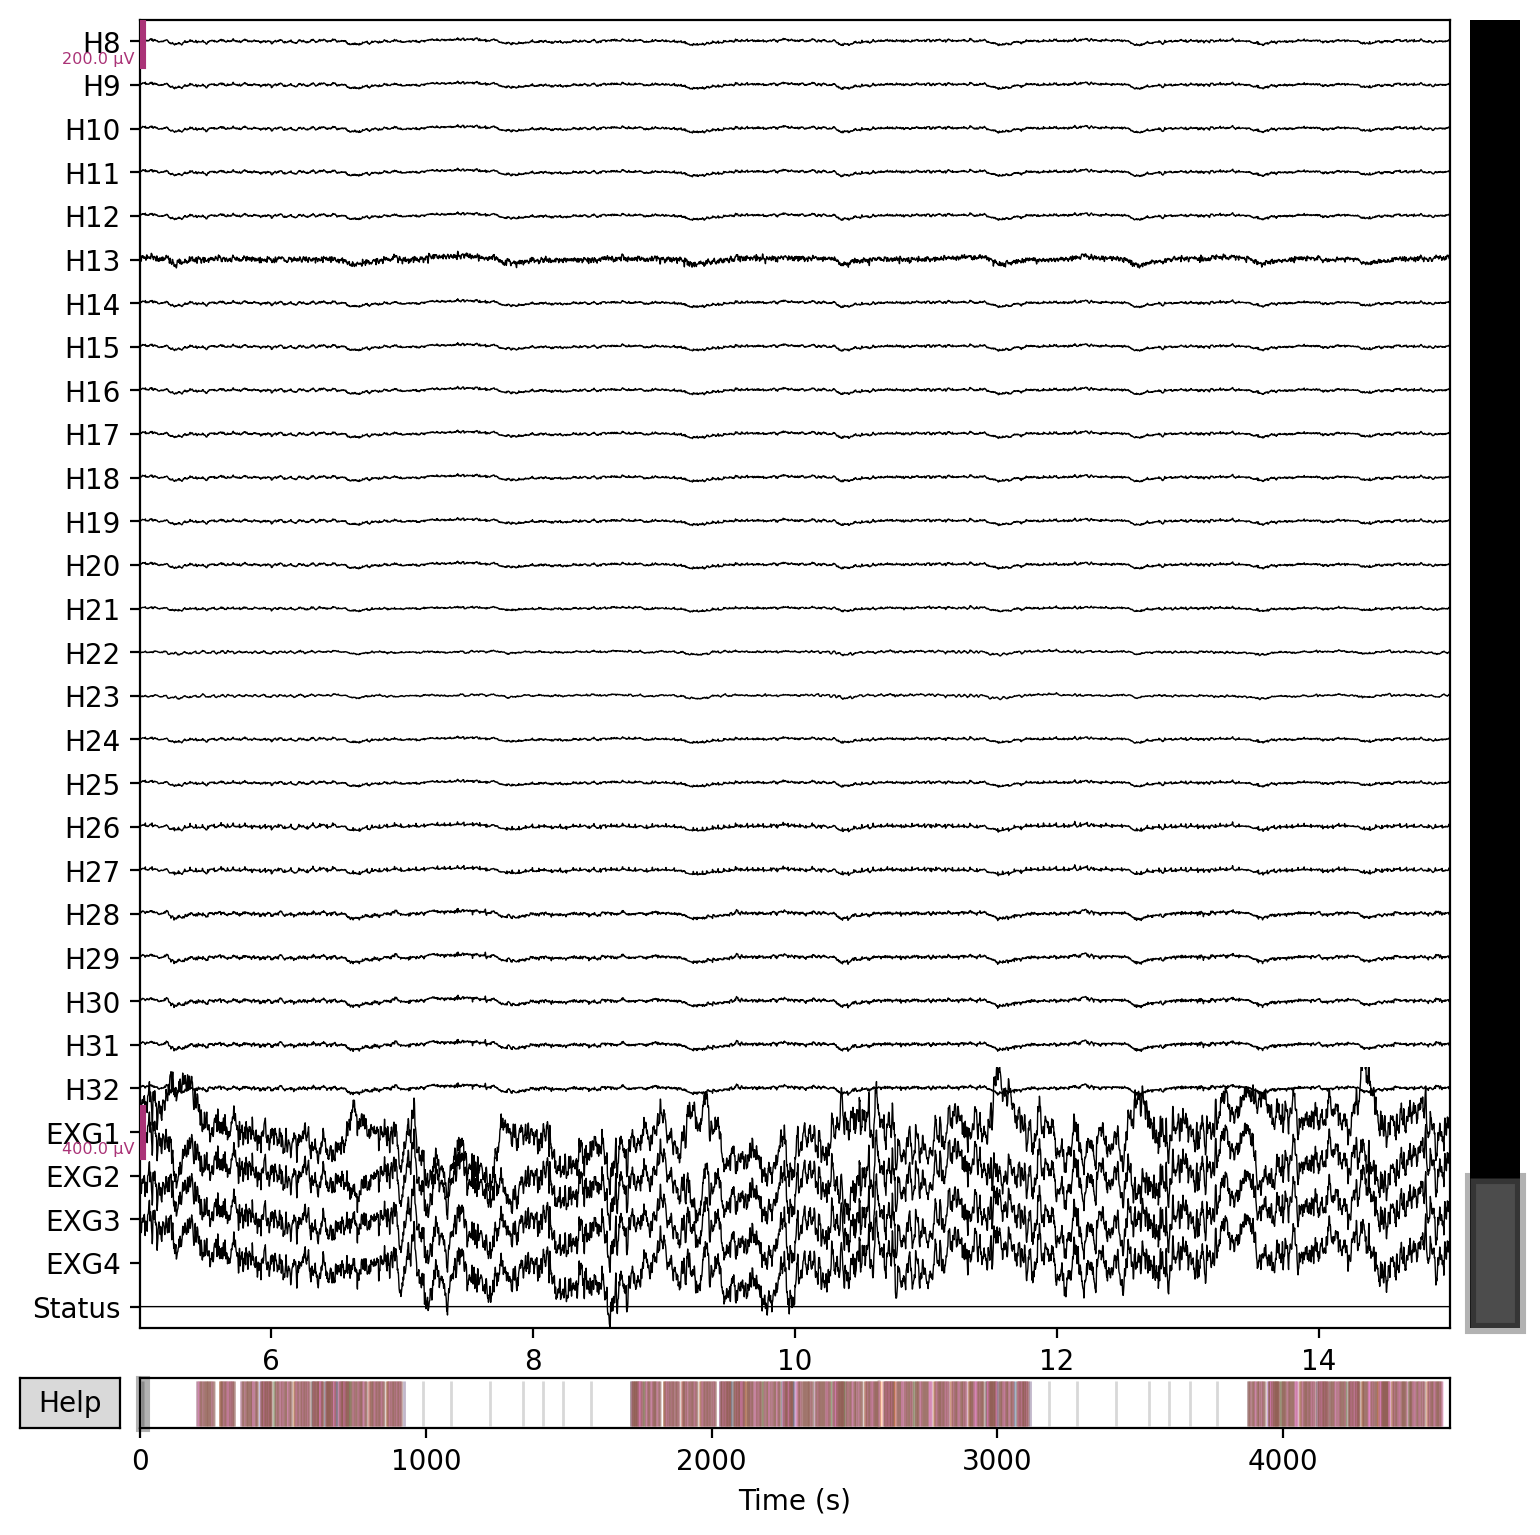

In [9]:
# Check the data again to see if we should exclude more channels
# if so .. go back to previous step
raw_interp_copy = raw_interp.copy()
raw_interp_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
raw_interp_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)